In [150]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD

In [107]:
sess = tf.Session()
init_var = tf.global_variables_initializer()
sess.run(init_var)

In [58]:
# Load data
inputs = np.genfromtxt ('basf_inputs_rand_normalized.csv', delimiter=",")
targets = np.genfromtxt ('basf_targets_rand_normalized.csv', delimiter=",")

print(inputs[0:2, :])
print(targets[0:2])

[[3.         4.         1.         1.         0.65765766 0.25
  1.         0.8        0.         0.57142857 0.40765391 1.        ]
 [7.         4.         1.         3.         0.65765766 0.25
  0.93366093 0.         1.         1.         0.66139767 0.5       ]]
[0.33097762 0.26266196]


In [126]:
data = inputs

print("Number of examples: %i" % n)
print(data[0:2, :])

Number of examples: 1029
[[3.         4.         1.         1.         0.65765766 0.25
  1.         0.8        0.         0.57142857 0.40765391 1.        ]
 [7.         4.         1.         3.         0.65765766 0.25
  0.93366093 0.         1.         1.         0.66139767 0.5       ]]


In [119]:
def convert_to_onehot(data):
    one_hots = []
    for i in range(4):
        depth = np.max(data[:, i])
        indicies = data[:, i]
        casted_indicies = tf.cast(indicies, tf.int32)
        one_hot = tf.one_hot(casted_indicies, depth)
        one_hots.append(one_hot)
    concat_one_hot = tf.concat(one_hots[:], 1)
    onehot_data = tf.concat([concat_one_hot, data[:, 4:]], 1)
    print(sess.run(onehot_data))
    return onehot_data
    
onehot_data = convert_to_onehot(data)

[[0.         0.         0.         ... 0.4076539  1.         0.33097762]
 [0.         0.         0.         ... 0.6613977  0.5        0.26266196]
 [0.         0.         1.         ... 0.7121464  0.33333334 0.10600707]
 ...
 [0.         0.         0.         ... 0.36439267 1.         0.34393403]
 [0.         0.         0.         ... 0.42845258 0.33333334 0.02120141]
 [0.         1.         0.         ... 0.68053246 0.5        0.29799765]]


In [128]:
training_x = onehot_data[0:799, :]
training_y = targets[0:799]
validation_x = onehot_data[800:999, :]
validation_y = targets[800:999]
test_x = onehot_data[1000:, :]
test_y = targets[1000:]

print(sess.run(training[0:2, :]))
print(sess.run(validation[0:2, :]))
print(sess.run(test[0:2, :]))

[[0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         1.         0.         0.         0.6576577
  0.25       1.         0.8        0.         0.5714286  0.4076539
  1.         0.33097762]
 [0.         0.         0.         0.         0.         0.
  0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         1.         0.6576577
  0.25       0.9336609  0.         1.         1.         0.6613977
  0.5        0.26266196]]
[[0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         1.
  1.         0.         1.         0.         0.         0.53783786
  1.         0.8108108  0.8        0.         0.5714286  0.39767054
  0.75       0.1696113 ]
 [0.         0.         0.         0.         0.         1.
  0.         0.         0.         0.         1.         0.
  0.         0.         0.         0.   

In [152]:
model = Sequential()
model.add(Dense(20, activation='relu', input_dim=26))
model.add(Dense(10, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.add(Dense(1))

sgd = SGD(lr=0.1)
model.compile(sgd, loss='mean_squared_error')
history = model.fit(training_x, training_y, validation_data=(validation_x, validation_y), validation_steps=10, steps_per_epoch=44, epochs=100)

Train on 799 samples, validate on 199 samples
Epoch 1/100
44/44 [==============================] - 0s 5ms/step - loss: 0.0594 - val_loss: 0.0473
Epoch 2/100
44/44 [==============================] - 0s 696us/step - loss: 0.0416 - val_loss: 0.0469
Epoch 3/100
44/44 [==============================] - 0s 697us/step - loss: 0.0413 - val_loss: 0.0465
Epoch 4/100
44/44 [==============================] - 0s 692us/step - loss: 0.0409 - val_loss: 0.0461
Epoch 5/100
44/44 [==============================] - 0s 656us/step - loss: 0.0405 - val_loss: 0.0456
Epoch 6/100
44/44 [==============================] - 0s 652us/step - loss: 0.0400 - val_loss: 0.0451
Epoch 7/100
44/44 [==============================] - 0s 655us/step - loss: 0.0395 - val_loss: 0.0444
Epoch 8/100
44/44 [==============================] - 0s 658us/step - loss: 0.0388 - val_loss: 0.0437
Epoch 9/100
44/44 [==============================] - 0s 672us/step - loss: 0.0381 - val_loss: 0.0428
Epoch 10/100
44/44 [===========================

44/44 [==============================] - 0s 651us/step - loss: 3.0221e-04 - val_loss: 3.4283e-04
Epoch 78/100
44/44 [==============================] - 0s 648us/step - loss: 2.9893e-04 - val_loss: 3.3914e-04
Epoch 79/100
44/44 [==============================] - 0s 646us/step - loss: 2.9579e-04 - val_loss: 3.3557e-04
Epoch 80/100
44/44 [==============================] - 0s 663us/step - loss: 2.9277e-04 - val_loss: 3.3206e-04
Epoch 81/100
44/44 [==============================] - 0s 653us/step - loss: 2.8980e-04 - val_loss: 3.2863e-04
Epoch 82/100
44/44 [==============================] - 0s 654us/step - loss: 2.8688e-04 - val_loss: 3.2529e-04
Epoch 83/100
44/44 [==============================] - 0s 657us/step - loss: 2.8404e-04 - val_loss: 3.2207e-04
Epoch 84/100
44/44 [==============================] - 0s 663us/step - loss: 2.8131e-04 - val_loss: 3.1903e-04
Epoch 85/100
44/44 [==============================] - 0s 667us/step - loss: 2.7865e-04 - val_loss: 3.1611e-04
Epoch 86/100
44/44 [===

In [153]:
print("MSE: %.8f" % model.evaluate(test_x, test_y, steps=128))

128/128 [==============================] - 0s 386us/step
MSE: 0.00013832


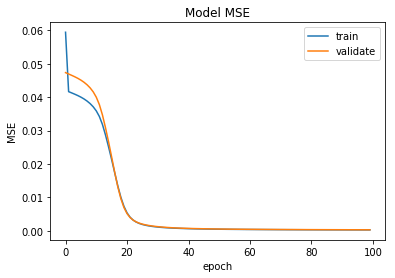

In [156]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'validate'], loc='upper right')
plt.show()